# EXECUTIVE SUMMARY

<B>MODULE 2 SUMMATIVE LAB

In this module 2 summative lab, i explored a football and weather data to find key information regarding the goals scored, wins and the percentage of rainy day games during the 2011 season. I firstly examined all the data within the football SQL database and then using it to get team all of the unique team names, the goals scored, and the number of wins using queries.

<b>IMPORTING PACKAGES

Firstly i imported all the necessary packages such as pandas and sqlite3, and i also connected to the SQL database.

In [3]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# connecting to the database
import sqlite3 
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

<b>UNIQUE TEAM NAMES

I seleted all the unique team names

In [5]:
#selects unique names of teams
cur.execute('''SELECT DISTINCT TeamName
FROM Unique_Teams''')
df_uniqueTN = pd.DataFrame(cur.fetchall()) 
df_uniqueTN.columns = [i[0] for i in cur.description] 
df_uniqueTN

,TeamName
0,Bayern Munich
1,Dortmund
2,Leverkusen
3,RB Leipzig
4,Schalke 04
...,...
123,Burnley
124,Blackpool
125,Swansea
126,Cardiff


In [6]:
#creates an array for the unique list of team names
df_uniqueTN.TeamName.unique()

array(['Bayern Munich', 'Dortmund', 'Leverkusen', 'RB Leipzig',
       'Schalke 04', "M'gladbach", 'Wolfsburg', 'FC Koln', 'Hoffenheim',
       'Hertha', 'Mainz', 'Hamburg', 'Werder Bremen', 'Ein Frankfurt',
       'Augsburg', 'Freiburg', 'Stuttgart', 'Hannover', 'Ingolstadt',
       'Darmstadt', 'Paderborn', 'Nurnberg', 'Braunschweig',
       'Greuther Furth', 'Fortuna Dusseldorf', 'Kaiserslautern',
       'St Pauli', 'Bochum', 'Karlsruhe', 'Bielefeld', 'Cottbus',
       'Duisburg', 'Hansa Rostock', 'Aachen', 'Union Berlin',
       'Heidenheim', 'Dresden', 'Sandhausen', 'Erzgebirge Aue', 'Kiel',
       'Regensburg', 'Munich 1860', 'Wurzburger Kickers', 'Frankfurt FSV',
       'Aalen', 'Oberhausen', 'Osnabruck', 'Koblenz', 'Ahlen', 'Wehen',
       'CZ Jena', 'Offenbach', 'Essen', 'Burghausen', 'Unterhaching',
       'Saarbrucken', 'Siegen', 'Babelsberg', 'Chemnitz', 'Ein Trier',
       'Erfurt', 'F Koln', 'Gutersloh', 'Homburg', 'Leipzig', 'Lubeck',
       'Mannheim', 'Meppen', 'Oldenb

<b>TOTAL NUMBER OF GOALS SCORED BY THE TEAM DURING THE 2011 SEASON

I then created a query that will show the total goals scored by both the home team and the away team

In [11]:
#total number of goals scored by the team during 2011
cur.execute(""" SELECT HomeTeam, SUM(FTHG) AS ht_wins, AwayTeam, SUM(FTAG) AS at_wins
FROM Matches

WHERE Season = 2011
GROUP BY HomeTeam
ORDER BY SUM(FTHG) DESC;""")
       
dfGS = pd.DataFrame(cur.fetchall()) 
dfGS.columns = [i[0] for i in cur.description] 
dfGS.head()

,HomeTeam,ht_wins,AwayTeam,at_wins
0,Man City,55,Swansea,12
1,Man United,52,Tottenham,19
2,Bayern Munich,49,Dortmund,6
3,Schalke 04,47,Bayern Munich,14
4,Greuther Furth,46,Dresden,12


<b>TOTAL NUMBER OF WINS THE TEAM EARNED DURING THE 2011 SEASON

In [9]:
#total number of wins the team earned during the 2011 season

cur.execute("""SELECT HomeTeam,
      
(h_win + a_win) as total_wins,
(h_draw + a_draw) as total_draws,
(h_loss + a_loss) as total_losses,
      
(h_goals_for+a_goals_for) as GF,
(h_goals_agst+a_goals_agst) as GA,
(h_goals_for+a_goals_for-h_goals_agst-a_goals_agst) as GD,
((h_win + a_win)+(h_draw + a_draw)) as Pts
                    
FROM
                
(SELECT Div, HomeTeam, 
SUM(CASE WHEN FTHG > FTAG THEN 1 ELSE 0 END) as h_win,
SUM(CASE WHEN FTHG = FTAG THEN 1 ELSE 0 END) as h_draw,
SUM(CASE WHEN FTHG < FTAG THEN 1 ELSE 0 END) as h_loss,
SUM(FTHG) as h_goals_for,
SUM(FTAG) as h_goals_agst

FROM Matches
WHERE Season = 2011
GROUP BY HomeTeam
ORDER BY HomeTeam)
            
JOIN
            
(SELECT AwayTeam, 
SUM(CASE WHEN FTAG > FTHG THEN 1 ELSE 0 END) as a_win,
SUM(CASE WHEN FTAG = FTHG THEN 1 ELSE 0 END) as a_draw,
SUM(CASE WHEN FTAG < FTHG THEN 1 ELSE 0 END) as a_loss,
SUM(FTAG) as a_goals_for,
SUM(FTHG) as a_goals_agst
              
FROM Matches
WHERE Season = 2011
GROUP BY AwayTeam
ORDER BY AwayTeam)
            
ON (HomeTeam==AwayTeam)
            

ORDER BY Pts DESC, GD DESC, GF DESC""")
       
dfTWL = pd.DataFrame(cur.fetchall()) 
dfTWL.columns = [i[0] for i in cur.description]
dfTWL.head()

,HomeTeam,total_wins,total_draws,total_losses,GF,GA,GD,Pts
0,Man City,28,5,5,93,29,64,33
1,Man United,28,5,5,89,33,56,33
2,Dortmund,25,6,3,80,25,55,31
3,Greuther Furth,20,10,4,73,27,46,30
4,Fortuna Dusseldorf,16,14,4,64,35,29,30


<b>HISTOGRAM VISUALIZATION WITH WINS AND LOSSES OF 2011

A histogram of the team's wins and losses for the 2011 season

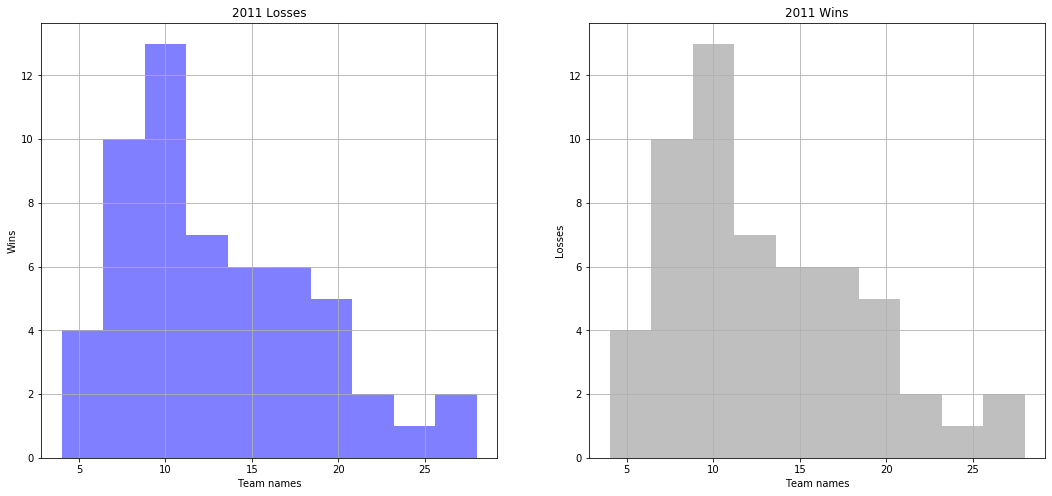

In [10]:
# A histogram visualization of the team's wins and losses for the 2011 season
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8)) # Two figures side by side
ax_lft = axes[0]
dfTWL['total_wins'].hist(ax=ax_lft, color='blue', alpha=0.5)
ax_lft.set_title('2011 Losses')
ax_lft.set_xlabel('Team names')
ax_lft.set_ylabel('Wins')

ax_rght = axes[1]
dfTWL['total_wins'].hist(ax=ax_rght, color='grey', alpha=0.5)
ax_rght.set_title('2011 Wins')
ax_rght.set_xlabel('Team names')
ax_rght.set_ylabel('Losses');

<B>EXPLORING THE DARKSKY API

To get the percentage of the amount of games where it was raining or not, i explored the DarkSky API which provided the historical weather data for each of the 2011 dates.

In [12]:
#importing json file with api key
import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)
    
#getting api key
keys = get_keys("/Users/Isabel .LAPTOP-RN1IGMF0/OneDrive/Desktop/Projects/Project 2/module_2_project/.secret/darksky_api.json")
api_key = keys['api_key']
keys

{'api_key': '50d59d5d17c163a2a460a8023009e953'}

In [13]:
#getting requests
import requests
response = requests.get("https://api.darksky.net/forecast/90e2937454f78fc8a3aa3f6f0bcad17d/52.5200,13.4050,2011-12-11T12:00:00?currently,daily")

#getting status code
response.status_code

200

In [14]:
#selecting dataframe and the data dictionary within
df_weather = pd.DataFrame.from_dict(response.json()['daily']['data'])
df_weather.head()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipProbability,temperatureHigh,...,uvIndexTime,visibility,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1323558000,Mostly cloudy throughout the day.,partly-cloudy-day,1323587280,1323615240,0.54,0,0,0,41.55,...,1323601080,6.212,32.7,1323588960,41.55,1323605040,25.47,1323586860,34.94,1323605040


<b>IMPORTING TO MONGODB

Once all of the data required was generated, i stored everything within mongodb

In [ ]:
import pymongo
from pymongo import MongoClient

myclient = pymongo.MongoClient('mongodb://localhost:27017')
mydb = myclient['lab_db']

In [ ]:
FootballWeather = mydb['collection']

In [ ]:
Teams = {'Team name': df_uniqueTN}
TGS = {'Total goals scored': dfGS}
TWL = {'total wins losses': dfTWL}
Rain = {'rain percentage': dfTWL}
         
all_records = [Teams, TGS, TWL, Rain]
insertion_results = FootballWeather.insert_many(all_records)